# DS-SF-34 | 14 | Clustering | Assignment | Answer Key

## Clustering on the Iris dataset

In [1]:
import os

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

from sklearn import preprocessing, decomposition, cluster

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In this assignment, we will be clustering irises using their petal's and sepal's length and width.  Because clustering is an unsupervised learning method, we will hold on the species outcome.  However, we hope that the structure that clustering will reveal to do similar to the irises species.

In [2]:
df = pd.read_csv(os.path.join('..', 'datasets', 'dataset-14-iris.csv'))

> ## Question.  Perform Principal Component Analysis (PCA).  Using the first-principle component for $k$-Means with $k=3$, compare the resulting clusters to the irises species.  Conclude.

In [3]:
X = df[ ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'] ]
c = df.Species

### Principal Component Analysis (PCA)

In [4]:
pca = decomposition.PCA().fit(X)
X = pca.transform(X)

X_columns = ['PC0', 'PC1', 'PC2', 'PC3']
X = pd.DataFrame(X, columns = X_columns)

In [5]:
pca.components_

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [ 0.65653988,  0.72971237, -0.1757674 , -0.07470647],
       [-0.58099728,  0.59641809,  0.07252408,  0.54906091],
       [ 0.31725455, -0.32409435, -0.47971899,  0.75112056]])

In [6]:
pca.n_components_

4L

In [7]:
normalized_var = pca.explained_variance_ratio_

In [8]:
normalized_var

array([ 0.92461621,  0.05301557,  0.01718514,  0.00518309])

The first principle component captures 92% of the variance.

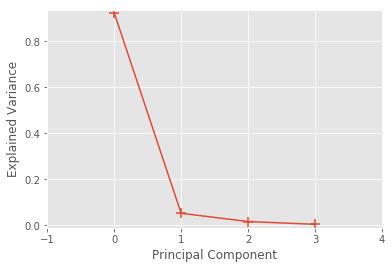

In [9]:
plt.plot(normalized_var)

plt.scatter(x = range(len(normalized_var)),
    y = normalized_var,
    marker = '+',
    s = 100)

plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.xlim(-1, len(normalized_var))
plt.ylim(-.01, max(normalized_var) + .01)

pass

### Feature Normalization

$k$-Means is a distance-based algorithm so we need to normalize features.

In [10]:
scaler = preprocessing.MinMaxScaler().fit(X)
X = scaler.transform(X)
X = pd.DataFrame(X, columns = X_columns)

### $3$-Means

In [11]:
def clusters_vs_classes(X):
    model = cluster.KMeans(n_clusters = 3, random_state = 0).fit(X)
    cluster_ = pd.Series(model.labels_)
    return pd.crosstab(cluster_, c, rownames = ['Cluster'], colnames = ['Species'])

In [12]:
clusters_vs_classes(X[ ['PC0'] ])

Species,Setosa,Versicolor,Virginica
Cluster,,,
0,50,0,0
1,0,49,12
2,0,1,38


Answer:  Setosas have all been clustered together.  All Versicolors but one are in another.  However, Virginicas have been split across two clusters.  Not too bad considering $k$-Means didn't use these labels in the first place.

In [13]:
clusters_vs_classes(X[ ['PC0', 'PC1'] ])

Species,Setosa,Versicolor,Virginica
Cluster,,,
0,50,0,0
1,0,37,16
2,0,13,34


In [14]:
clusters_vs_classes(X[ ['PC0', 'PC1', 'PC2'] ])

Species,Setosa,Versicolor,Virginica
Cluster,,,
0,0,42,17
1,0,8,33
2,50,0,0


In [15]:
clusters_vs_classes(X[ ['PC0', 'PC1', 'PC2', 'PC3'] ])

Species,Setosa,Versicolor,Virginica
Cluster,,,
0,0,9,32
1,50,0,0
2,0,41,18


Note:  Adding more principle components doesn't improve the clusters/species matching.